<a href="https://colab.research.google.com/github/vardhanreddy2003/Deep_learning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X,y=make_moons(100,noise=0.25,random_state=2)

<Axes: >

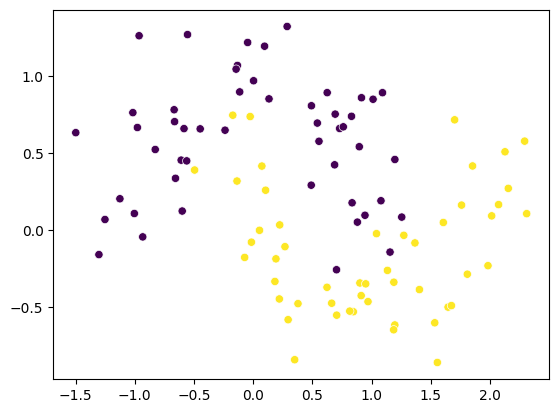

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],c=y)

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

In [ ]:
model=Sequential()

model.add(Dense(128,input_dim=2,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam=Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

In [ ]:
history=model.fit(X,y,epochs=100,validation_split=0.2,verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 517ms/step - accuracy: 0.7492 - loss: 0.5988 - val_accuracy: 0.9000 - val_loss: 0.3075
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8367 - loss: 0.3855 - val_accuracy: 0.9000 - val_loss: 0.2027
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8508 - loss: 0.3941 - val_accuracy: 0.9000 - val_loss: 0.2024
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8305 - loss: 0.3784 - val_accuracy: 0.9000 - val_loss: 0.2287
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8508 - loss: 0.3227 - val_accuracy: 0.9000 - val_loss: 0.3130
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8602 - loss: 0.3339 - val_accuracy: 0.9000 - val_loss: 0.2446
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8172 - loss: 0.3402 - val_accuracy: 0.8500 - val_loss: 0.2067
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8305 - loss: 0.3429 - val_accuracy: 0.8500 - val_loss

In [ ]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step


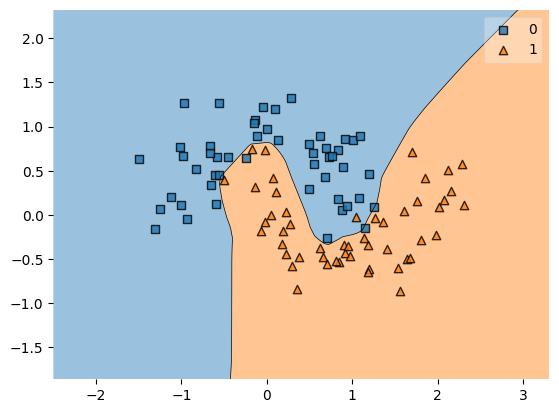

In [ ]:
plot_decision_regions(X,y,clf=model)
plt.show()

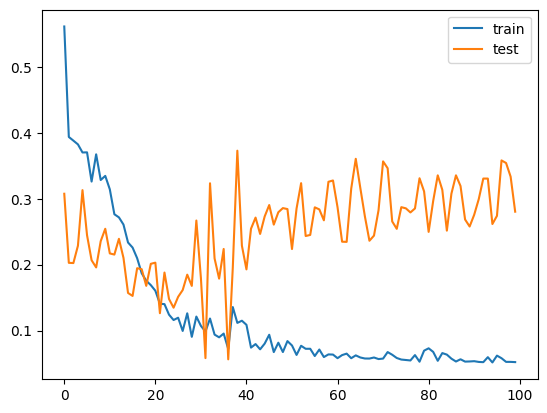

In [ ]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.legend()
plt.show()

In [ ]:
model2=Sequential()

model2.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model2.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model2.add(Dense(1,activation="sigmoid"))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam=Adam(learning_rate=0.01)
model2.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

In [ ]:
y.shape

(100,)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
callback=EarlyStopping(
    monitor="accuracy",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [ ]:
history2=model2.fit(X,y,epochs=2000,validation_split=0.2,verbose=1,callbacks=callback)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.4187 - loss: 1.8876 - val_accuracy: 0.9000 - val_loss: 1.2842
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8203 - loss: 1.2192 - val_accuracy: 0.9000 - val_loss: 0.8181
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8344 - loss: 0.8461 - val_accuracy: 0.9000 - val_loss: 0.5620
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8547 - loss: 0.6327 - val_accuracy: 0.9000 - val_loss: 0.4952
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8586 - loss: 0.5493 - val_accuracy: 0.9000 - val_loss: 0.4586
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8234 - loss: 0.5779 - val_accuracy: 0.8500 - val_loss: 0.3983
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8367 - loss: 0.5093 - val_accuracy: 0.9000 - val_loss: 0.4482
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8523 - loss: 0.4788 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


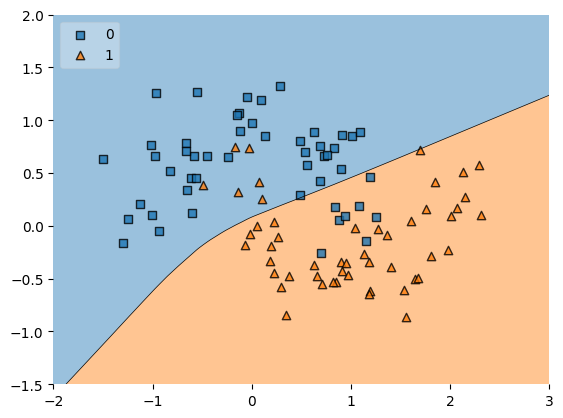

In [ ]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()